In [2]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite

In [3]:
al = '..//Data//out.moreno_crime_crime'
gender = '..//Data//ent.moreno_crime_crime.person.sex'
name = '..//Data//ent.moreno_crime_crime.person.name'
role = '..//Data//rel.moreno_crime_crime.person.role'

In [4]:
al_df = pd.read_csv(al, sep=" ", header=None, names=['person', 'crime', 'bla'])
al_df.drop(al_df.columns[len(al_df.columns)-1], axis=1, inplace=True)
al_df['person'] = 'p' + al_df['person'].astype(str)
al_df['crime'] = 'c' + al_df['crime'].astype(str)
al_df

,person,crime
0,p1,c1
1,p1,c2
2,p1,c3
3,p1,c4
4,p2,c5
...,...,...
1471,p825,c399
1472,p826,c300
1473,p827,c265
1474,p828,c298


In [5]:
gender_df = pd.read_csv(gender, sep=" ", header=None)
gender_df.head(3)
gender_df.shape

(829, 1)

In [6]:
name_df = pd.read_csv(name, sep=" ", header=None)
name_df.head(3)
name_df.shape

(829, 1)

In [7]:
role_df = pd.read_csv(role, sep=",", header=None)
role_df.head(3)
role_df[0][2]
role_df.shape

(1476, 1)

In [8]:
people = al_df['person'].unique()
crimes = al_df['crime'].unique()

In [9]:
len(people) + len(crimes)

1380

In [10]:

# create networkx graph
G=nx.Graph()

# G.add_nodes_from(people, bipartite=0, )
# # add nodes
for i in range(len(people)):
    # print(al_df['person'][i])
    G.add_node(al_df['person'][i], name=name_df[0][i], gender=gender_df[0][i], bipartite=0)

for i in range(len(crimes)):
    G.add_node(al_df['crime'][i], bipartite=1)

# # add edges
for i in range(len(al_df)):
    # print(al_df['person'][i], al_df['crime'][i])
    G.add_edge(al_df['person'][i], al_df['crime'][i], role=role_df[0][i])

In [11]:
print(
    'Num. of nodes: {} \nNum. of edges: {} \nIs bipartite? {} \nIs connected? {}'.format(
        G.number_of_nodes(), 
        G.number_of_edges(), 
        nx.is_bipartite(G),
        nx.is_connected(G)
        )
    )

Num. of nodes: 1380 
Num. of edges: 1476 
Is bipartite? True 
Is connected? False


In [12]:
# nx.get_edge_attributes(G, 'role')
# nx.get_node_attributes(G, 'name')

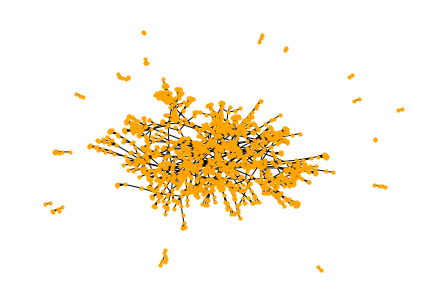

In [13]:
options = {
    'node_color': 'orange',
    'node_size': 10,
    # 'width': 3,
    'edge_color': 'black', 
    'linewidths': 1, 
    'font_size': 8,
    'with_labels': False
}

pos=nx.spring_layout(G)
nx.draw(G, pos, **options)

In [14]:
c = bipartite.color(G)
# print(c)

In [19]:
for i in G.nodes(data=True):
    print(i)

('p1', {'name': 'AbramsDon', 'gender': 1, 'bipartite': 0})
('p2', {'name': 'ArmandeBrian', 'gender': 1, 'bipartite': 0})
('p3', {'name': 'ArmbrusterCassia', 'gender': 0, 'bipartite': 0})
('p4', {'name': 'ArmstrongPearl', 'gender': 0, 'bipartite': 0})
('p5', {'name': 'ArthurDean', 'gender': 1, 'bipartite': 0})
('p6', {'name': 'AshRalph', 'gender': 1, 'bipartite': 0})
('p7', {'name': 'AsherJames', 'gender': 1, 'bipartite': 0})
('p8', {'name': 'AveryPhil', 'gender': 1, 'bipartite': 0})
('p9', {'name': 'AveryTerry', 'gender': 1, 'bipartite': 0})
('p10', {'name': 'BarkerQuincy', 'gender': 1, 'bipartite': 0})
('p11', {'name': 'BarretScott', 'gender': 1, 'bipartite': 0})
('p12', {'name': 'BarryKyle', 'gender': 1, 'bipartite': 0})
('p13', {'name': 'BartelsAmy', 'gender': 0, 'bipartite': 0})
('p14', {'name': 'BartonGermal', 'gender': 1, 'bipartite': 0})
('p15', {'name': 'BatistaCharonne', 'gender': 0, 'bipartite': 0})
('p16', {'name': 'BeckerIsabel', 'gender': 0, 'bipartite': 0})
('p17', {'name

In [15]:
top_nodes = {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}
bottom_nodes = set(G) - top_nodes

KeyError: 'bipartite'